# 필요 라이브러리 호출

In [74]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

# 폰트 지정

In [75]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

# 데이터 호출, 컬럼 이름 재설정

In [76]:
df = pd.read_csv('weather_kw_df.csv')
df.rename(columns= {"kw":"usage"}, inplace=True)

df.head()

year  month type  temp  Humidity_mean  rainfall_total  cloud   solar  snow  \
0  2016      1  가로등   0.9             69            49.7    6.0  244.83  13.5   
1  2016      1  교육용   0.9             69            49.7    6.0  244.83  13.5   
2  2016      1  농사용   0.9             69            49.7    6.0  244.83  13.5   
3  2016      1  산업용   0.9             69            49.7    6.0  244.83  13.5   
4  2016      1  심 야   0.9             69            49.7    6.0  244.83  13.5   

       usage  
0    7842078  
1   27092538  
2    9785066  
3  261196271  
4   18357075

# 데이터 가공

In [77]:
def type_change(type):
    if type == "일반용":
        return 1
    elif type == '주택용':
        return 2
    elif type == '가로등':
        return 3
    elif type == '교육용':
        return 4
    elif type == '농사용':
        return 5
    elif type == '산업용':
        return 6
    elif type == '심 야':
        return 7  

In [78]:
df['type'] = df['type'].apply(lambda x: type_change(x))

In [79]:
df.sort_values(by=['year', 'month', 'type'], inplace=True)

In [80]:
df

year  month  type  temp  Humidity_mean  rainfall_total  cloud   solar  \
5    2016      1     1   0.9             69            49.7    6.0  244.83   
6    2016      1     2   0.9             69            49.7    6.0  244.83   
0    2016      1     3   0.9             69            49.7    6.0  244.83   
1    2016      1     4   0.9             69            49.7    6.0  244.83   
2    2016      1     5   0.9             69            49.7    6.0  244.83   
..    ...    ...   ...   ...            ...             ...    ...     ...   
581  2022     12     3   1.1             63            30.6    5.0  275.78   
582  2022     12     4   1.1             63            30.6    5.0  275.78   
583  2022     12     5   1.1             63            30.6    5.0  275.78   
584  2022     12     6   1.1             63            30.6    5.0  275.78   
585  2022     12     7   1.1             63            30.6    5.0  275.78   

     snow      usage  
5    13.5  255851378  
6    13.5  173309722  
0    13.5    7842078  
1    13.5   27092538  
2    13.5    9785066  
..    ...        ...  
581  32.9    7316937  
582  32.9   31159967  
583  32.9    8624110  
584  32.9  256259483  
585  32.9    8466299  

[588 rows x 10 columns]

In [81]:
kw_df_year_month = df.drop(columns='type')

# 2016~2022 월별 전력 사용량 & 그래프

In [82]:
kw_df_year_month_year = df.pivot_table(index=['month'], 
                                     columns='year',
                                     values='usage', 
                                     aggfunc='sum')
kw_df_year_month_year

year        2016       2017       2018       2019       2020       2021  \
month                                                                     
1      753434128  765085605  807535917  801473294  756531697  811864417   
2      756942825  773394230  798506369  741798539  740068227  767227407   
3      714022910  717911461  698659795  682608470  696886117  697760777   
4      675078079  698719498  685492936  706906711  660659042  696052225   
5      630983018  634698659  648944709  653101920  610865447  659750505   
6      675463388  677388071  688052097  673982642  685305904  713734602   
7      731854626  761987673  753263260  726580978  723737539  790945617   
8      813713342  833272037  893914829  821995398  785929551  876521082   
9      742389262  758364504  765903998  756642371  810365666  781758101   
10     650524055  631753373  644126666  663822053  644708555  705603738   
11     679693535  680054617  672599955  663133327  681435087  710813620   
12     734269928  751018796  716810703  711251294  734615424  761414432   

year        2022  
month             
1      825882846  
2      788536591  
3      735401195  
4      712892007  
5      672419479  
6      717565017  
7      838798578  
8      892014835  
9      806887743  
10     691579483  
11     690524525  
12     744368423

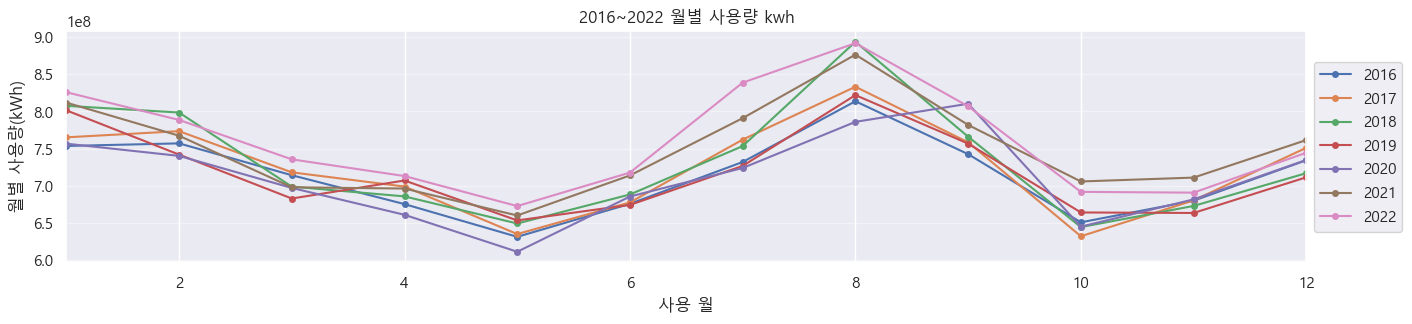

In [83]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_year, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_year.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2016~2022 월별 사용량 kwh')
plt.xlabel('사용 월')
plt.ylabel('월별 사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()

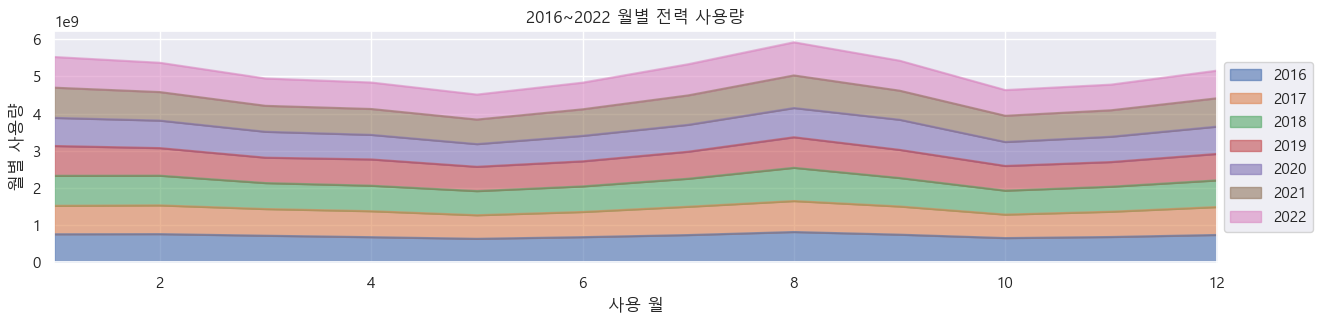

In [84]:
title='2016~2022 월별 전력 사용량'
ylabel='월별 사용량'
xlabel='사용 월'

ax = kw_df_year_month_year.plot.area(figsize=(15,3),alpha=0.6, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [85]:
df_drop_type = df.drop(['type'], axis=1)
kw_df = df_drop_type.groupby(['year', 'month','temp','Humidity_mean','rainfall_total','cloud','solar','snow'])['usage'].sum()
kw_df = kw_df.to_frame().reset_index()
kw_df

year  month  temp  Humidity_mean  rainfall_total  cloud   solar  snow  \
0   2016      1   0.9             69            49.7    6.0  244.83  13.5   
1   2016      2   3.3             60            45.2    4.5  348.22   5.6   
2   2016      3   8.4             60            55.2    4.1  520.95   0.0   
3   2016      4  15.5             66           185.0    5.8  541.64   0.0   
4   2016      5  19.8             65           104.5    5.2  681.60   0.0   
..   ...    ...   ...            ...             ...    ...     ...   ...   
79  2022      8  26.9             90           106.4    7.3  454.30   0.0   
80  2022      9  23.1             77            89.2    6.2  483.16   0.0   
81  2022     10  16.0             65            38.3    4.0  459.57   0.0   
82  2022     11  11.8             62            46.7    3.9  336.75   0.0   
83  2022     12   1.1             63            30.6    5.0  275.78  32.9   

        usage  
0   753434128  
1   756942825  
2   714022910  
3   675078079  
4   630983018  
..        ...  
79  892014835  
80  806887743  
81  691579483  
82  690524525  
83  744368423  

[84 rows x 9 columns]

# 기온과 전력 소비량 시각화

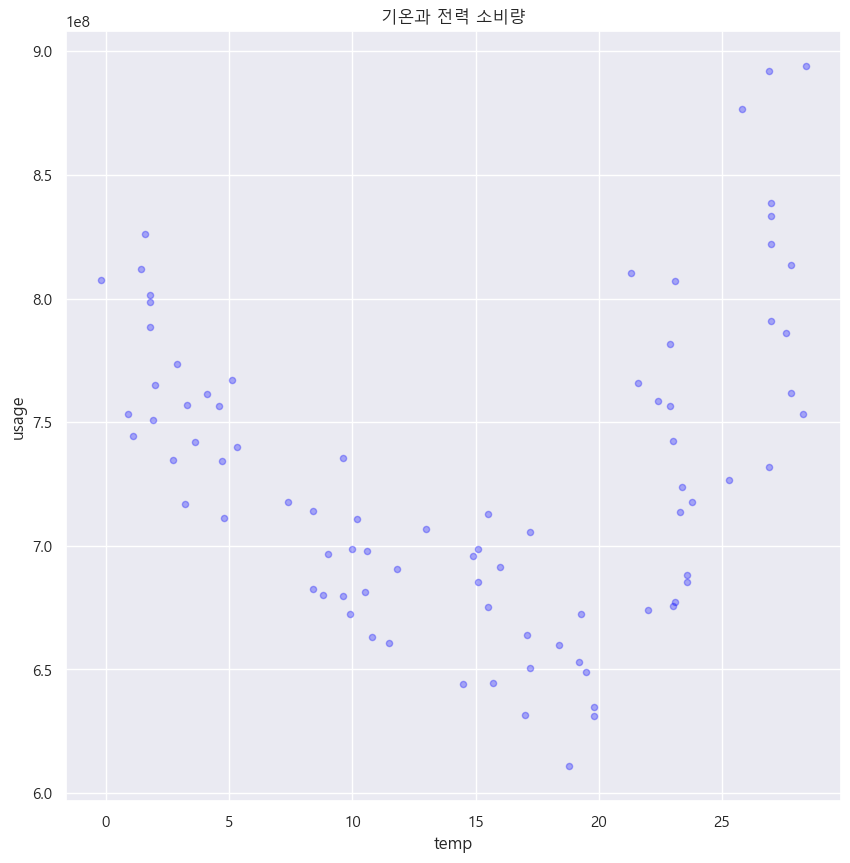

In [86]:

title='기온과 전력 소비량'
ylabel='전력 소비량'
xlabel='기온'
kw_df.plot.scatter(x='temp', y='usage', c='blue', cmap='coolwarm',alpha=0.3, title=title);


# 날씨와 전력 소비량의 상관관계 시각화 (월 기준)

In [87]:

weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    fig = px.scatter(kw_df,
                    x="temp",
                    y="usage",
                    title='날씨와 전력량에 따른 관계',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'usage': '전력량(kWh)', feature: col_label[feature]})
    fig.show()

In [88]:
weather_kw_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Box plot 생성
    box = go.Box(x=kw_df[feature], y=kw_df['usage'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kw)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [89]:
weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['usage'], z=kw_df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량 데이터                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kw)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

In [90]:
kw_df.columns

Index(['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'],
      dtype='object')

In [91]:
type1_df = df.query("type == 1")
type2_df = df.query("type == 2")
type3_df = df.query("type == 3")
type4_df = df.query("type == 4")
type5_df = df.query("type == 5")
type6_df = df.query("type == 6")
type7_df = df.query("type == 7")

In [92]:
type_dic = [type1_df, type2_df, type3_df, type4_df, type5_df, type6_df, type7_df]

In [93]:
typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}

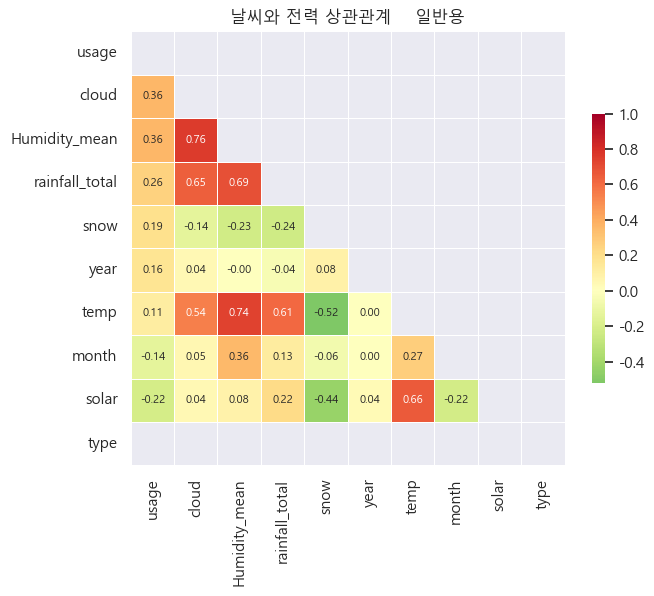

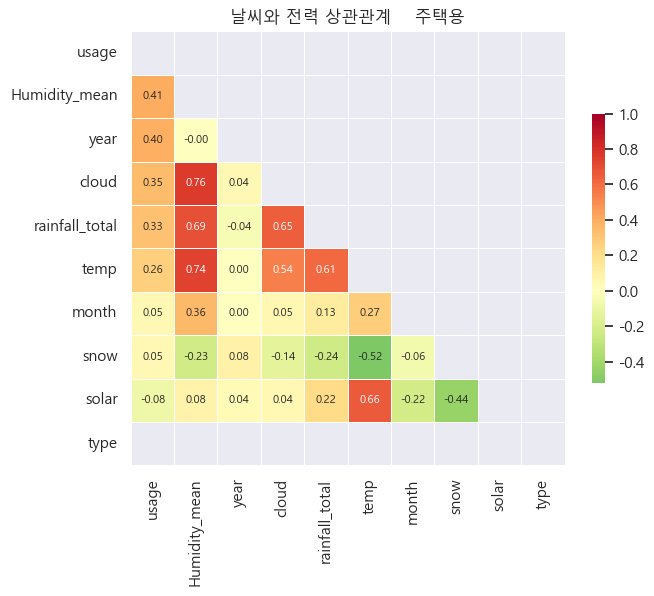

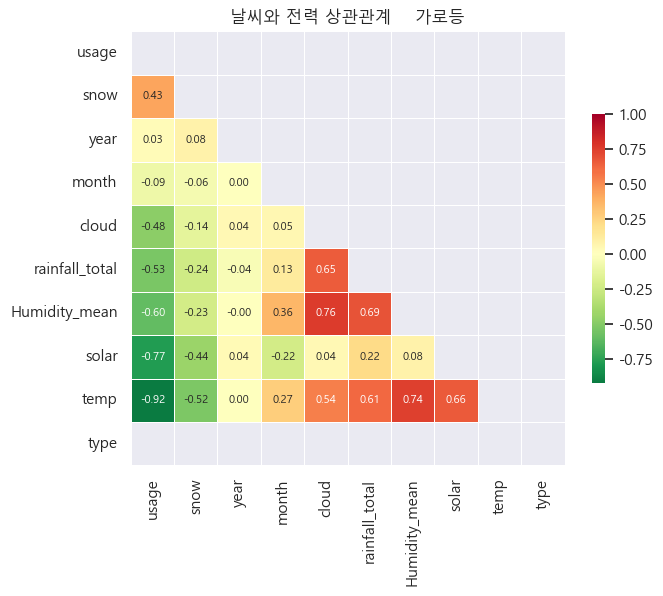

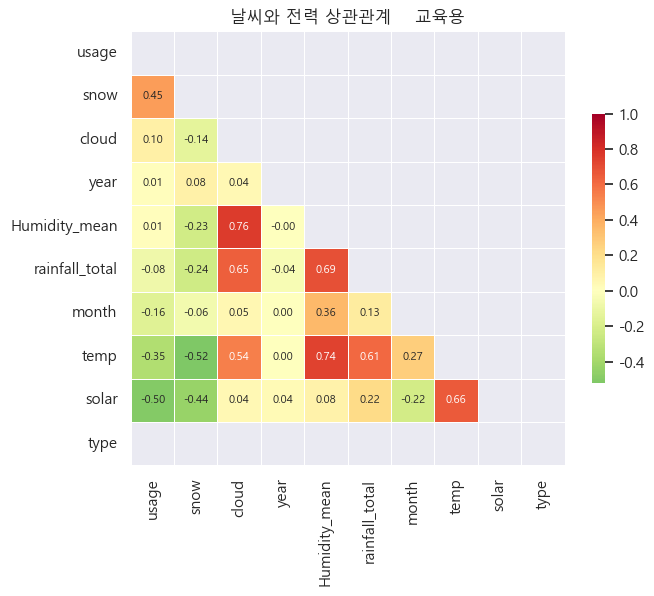

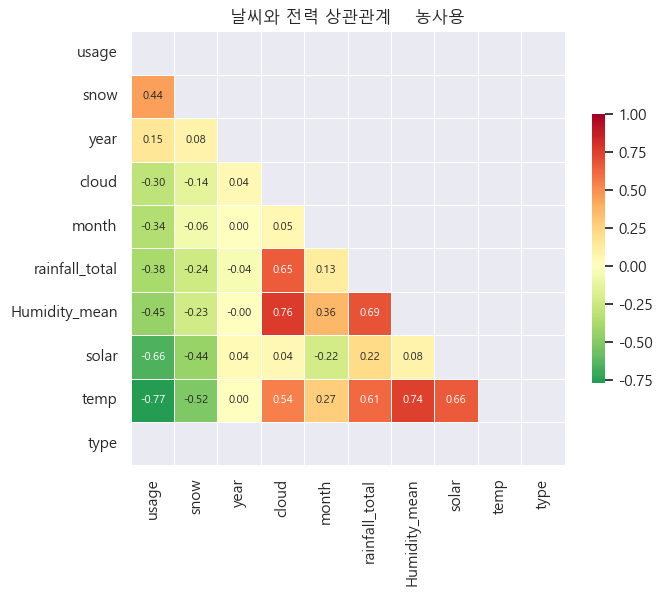

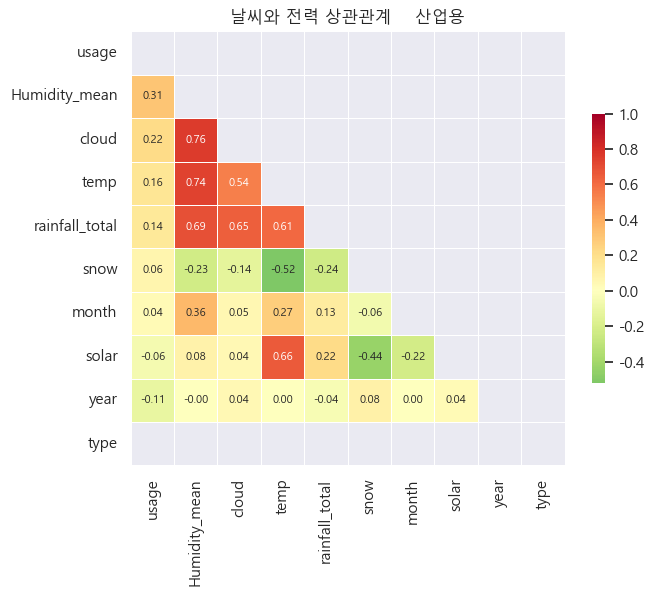

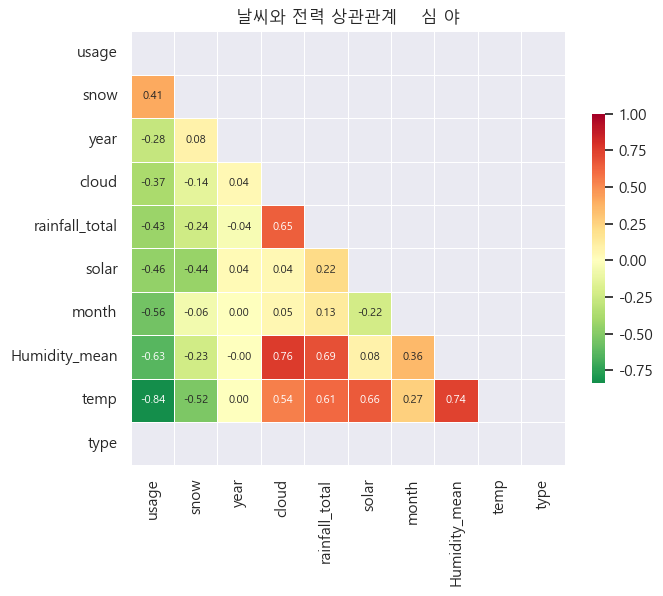

In [94]:
for i, item in enumerate(type_dic):
    num = i + 1
    
    kw_matrix = item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'usage', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(7, 7))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("날씨와 전력 상관관계    " + typename[num])

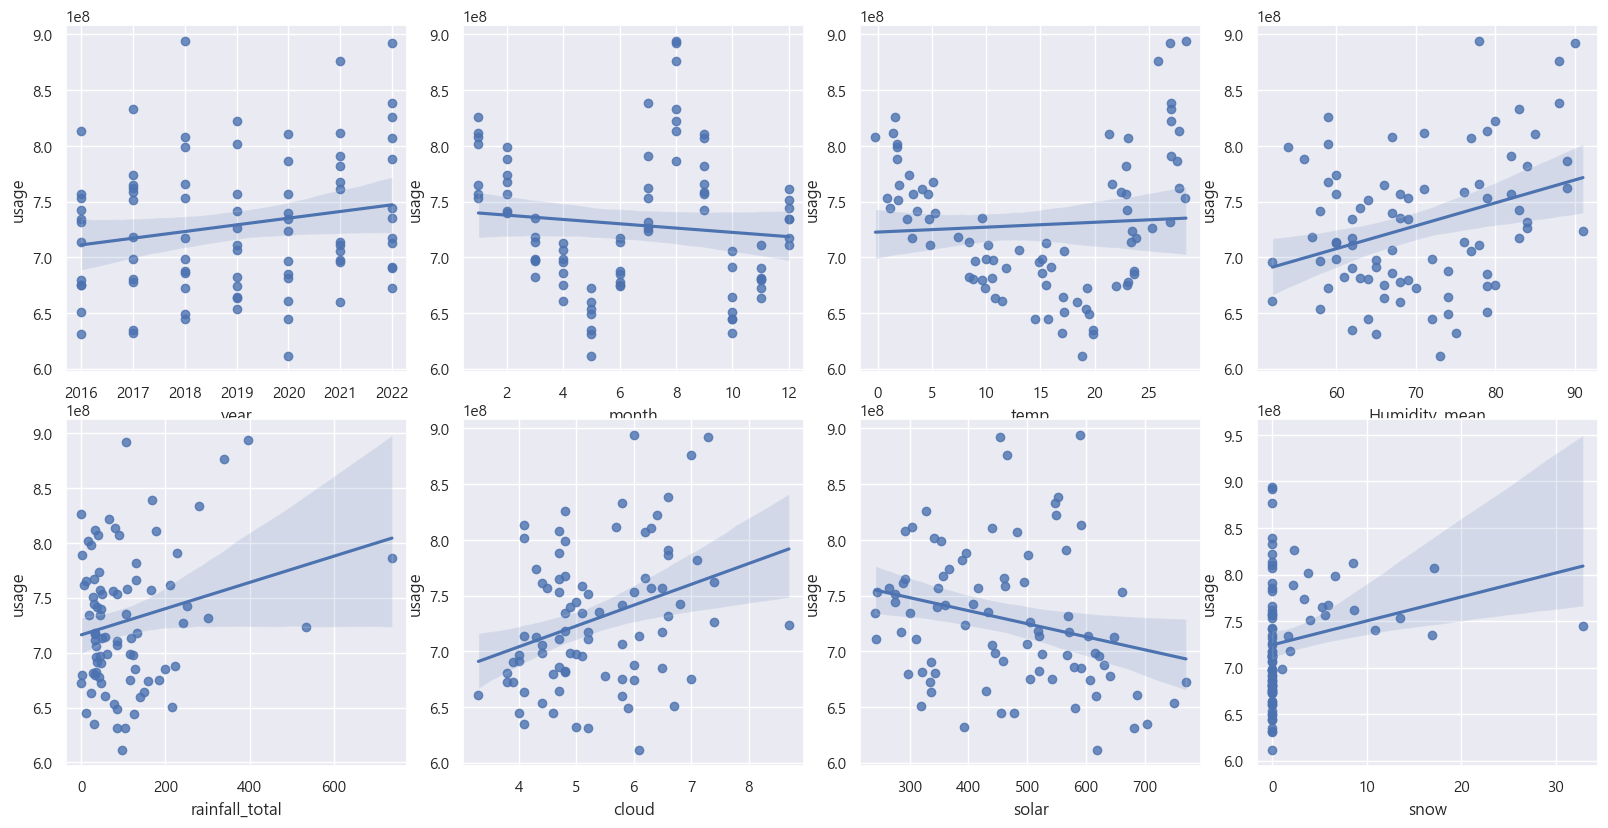

In [95]:
lm_features = ['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
plt.tight_layout()
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'usage', data = kw_df, ax = axs[row][col])

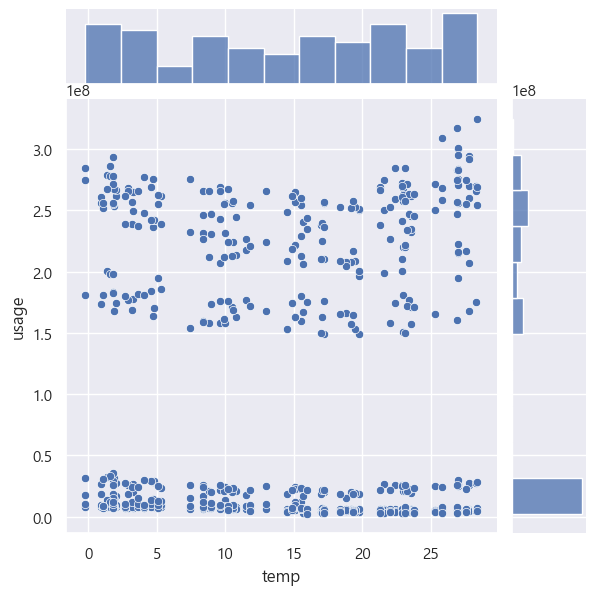

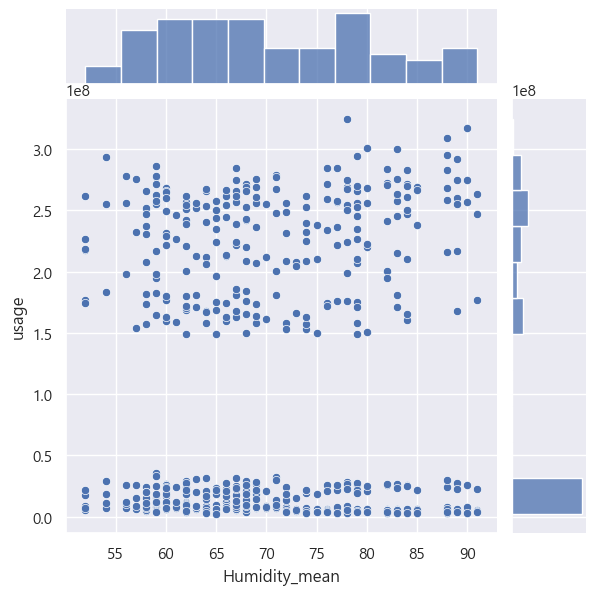

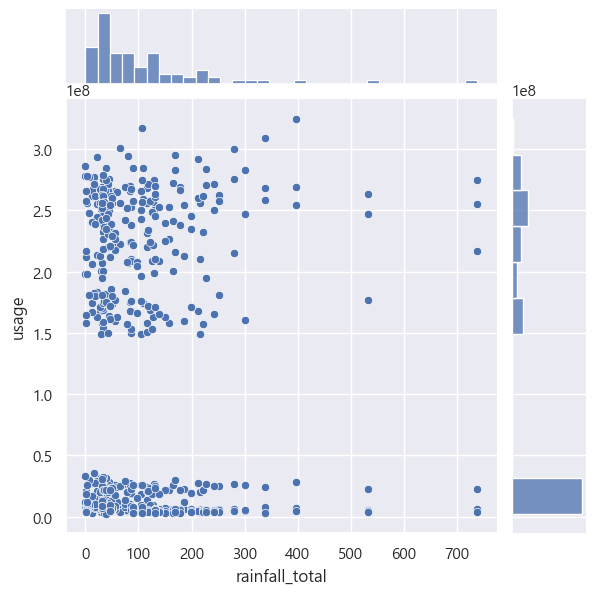

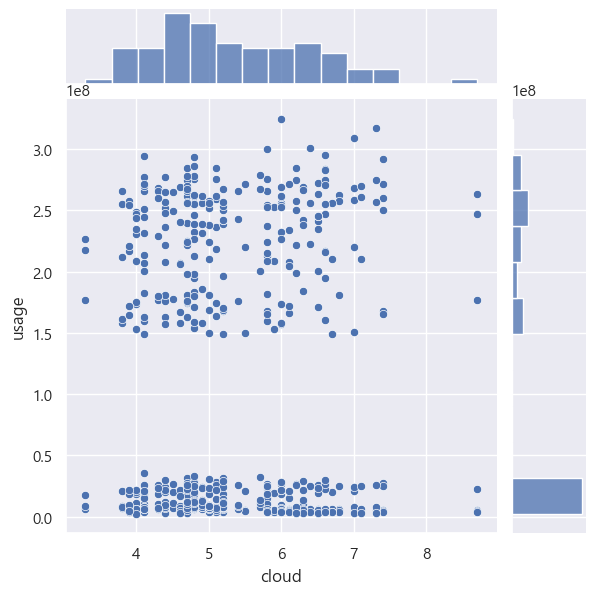

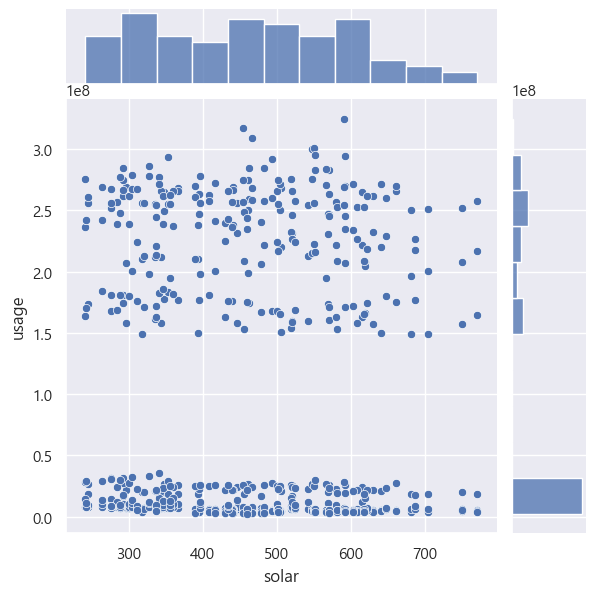

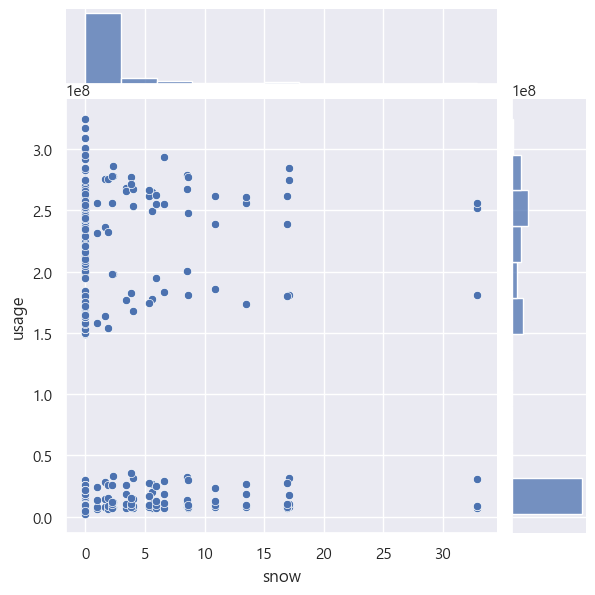

In [96]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']

for feature in weather_df:
    sns.jointplot(x = feature, y = 'usage', data = df)

# 월별 전력 사용량 그래프

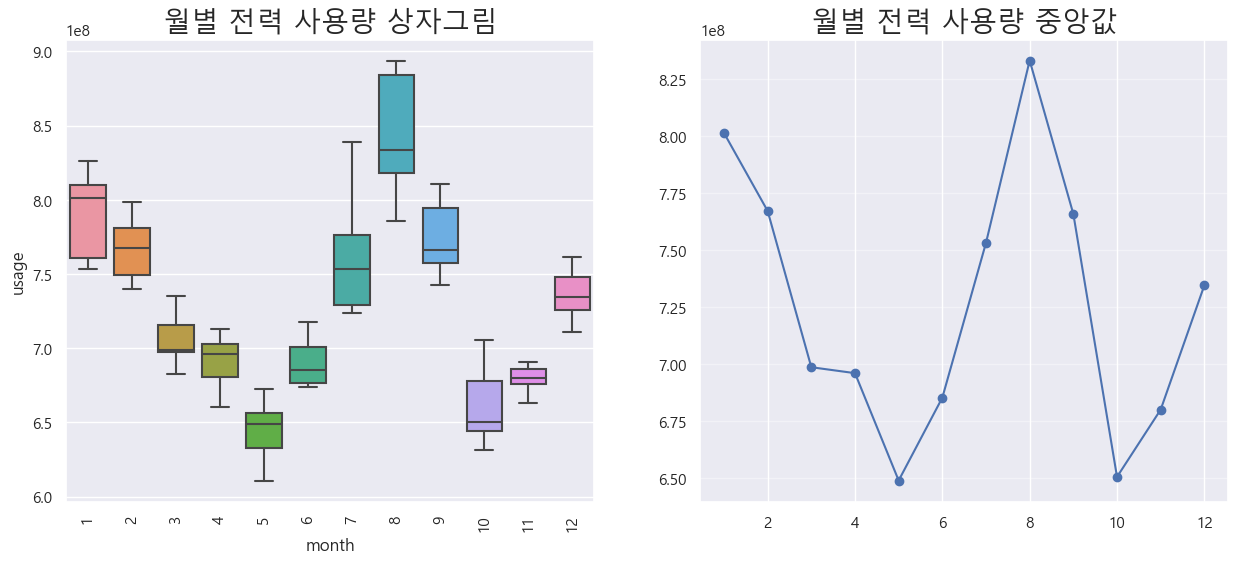

In [97]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="month", y="usage", data=kw_df, showfliers=False)
g.set_title('월별 전력 사용량 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(kw_df.groupby('month')['usage'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('월별 전력 사용량 중앙값', size = 20)
plt.show()

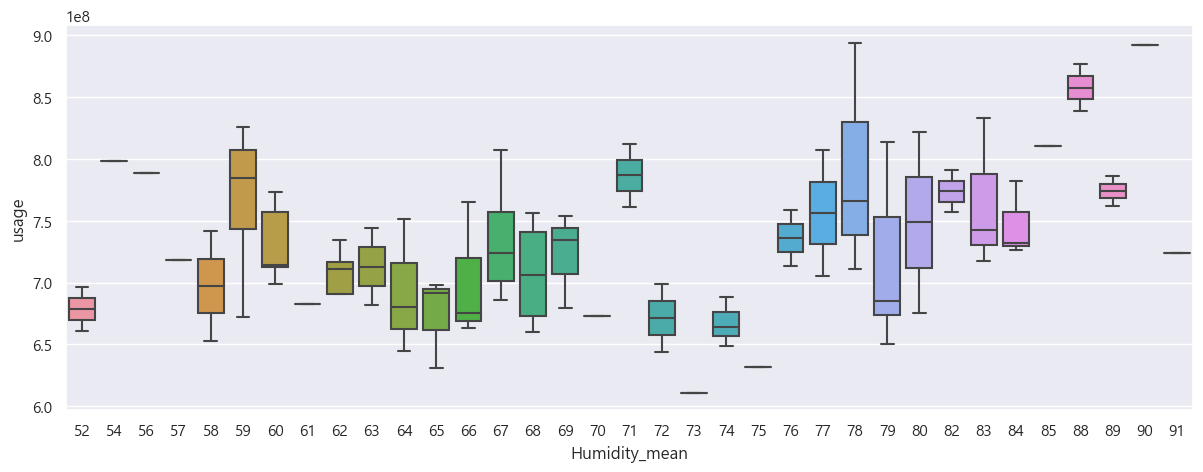

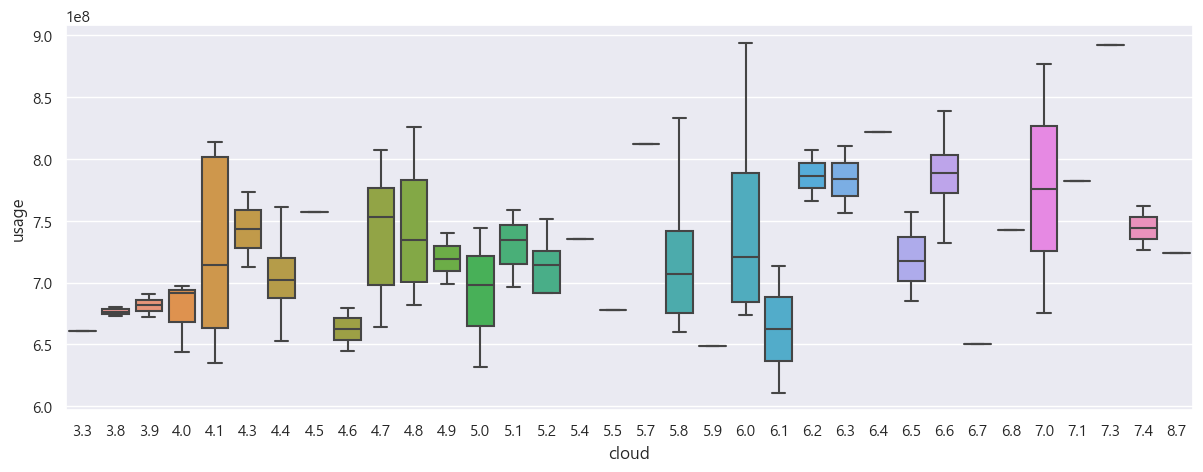

In [98]:
plt.figure(figsize=(32,5)) # 그래프 크기 조정 
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
sns.boxplot(x='Humidity_mean', y='usage', data = kw_df, showfliers=False)

plt.figure(figsize=(32,5)) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='cloud', y='usage', data = kw_df, showfliers=False)

plt.show()

In [99]:
kw_df_year_month_type = df.pivot_table(index=['month'], 
                                     columns='type',
                                     values='usage', 
                                     aggfunc='sum')
kw_df_year_month_type

type            1           2         3          4         5           6  \
month                                                                      
1      1913650669  1293689897  55119408  217089269  72696497  1862118301   
2      1895073864  1298171299  52116498  180555429  72800901  1757692027   
3      1620068516  1149107308  46803338  169992451  55907291  1813006973   
4      1546848284  1185319569  45876349  157380349  41680012  1791082953   
5      1447011978  1103649355  41759403  127987886  30991668  1721327257   
6      1613277294  1131121720  39804538  149615717  34111967  1834680408   
7      1836508092  1256493038  38440034  185030504  35285591  1946416665   
8      2121159471  1631010927  40696191  178778870  48032977  1868741258   
9      1892782934  1424957393  43407438  177318244  41942456  1818308569   
10     1531666252  1132737090  47123773  140386792  32738839  1724050825   
11     1502419262  1159590980  51226477  149432573  56914290  1811973116   
12     1710082258  1212298376  53327239  202336021  57376056  1837526414   

type           7  
month             
1      107443863  
2      110064170  
3       88364848  
4       67612982  
5       38036190  
6       28880077  
7       28994347  
8       28941380  
9       23594611  
10      23414352  
11      46697968  
12      80802636

# 월별 전력 사용량(용도별)

In [100]:
kw_df_year_month_type.rename(columns={1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심야'}, inplace=True)

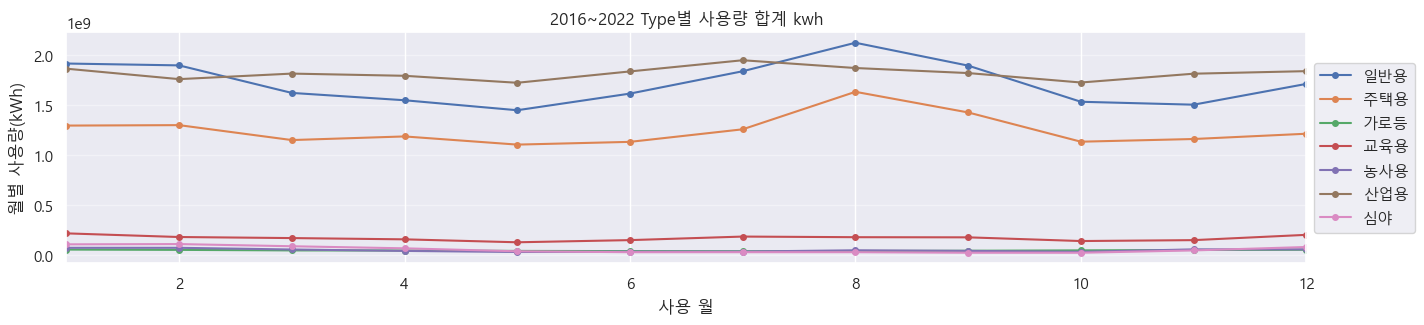

In [101]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_type, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_type.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2016~2022 Type별 사용량 합계 kwh')
plt.xlabel('사용 월')
plt.ylabel('월별 사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()

typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}

# 2016~2022 용도별 전력 사용량 비율

In [102]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


color_map = {"산업용": px.colors.sequential.Viridis[0], 
             "일반용": px.colors.sequential.Viridis[2], 
             "주택용": px.colors.sequential.Viridis[4], 
             "교육용": px.colors.sequential.Viridis[6], 
             "농사용": px.colors.sequential.Viridis[8], 
             "심  야": px.colors.sequential.Viridis[9], 
             "가로등": px.colors.sequential.Viridis[1]}

usage_part = df.groupby('type')['usage'].sum().sort_values(ascending=False)
subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("용도별 전력 사용량", "전체 전력 사용량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

usage_part.index = ["산업용","일반용","주택용","교육용","심  야", "농사용","가로등"]

# 파이 그래프 생성
subfig.add_trace(go.Pie( labels=usage_part.index, values=usage_part.values, showlegend=True, marker=dict(colors=[color_map[t] for t in usage_part.index])),1,1)

# 데이터를 그룹화, 막대 그래프
subfig.add_trace(go.Bar(x=usage_part.index, y=usage_part.values, showlegend=False, marker=dict(color=[color_map[t] for t in usage_part.index])),1,2)

# 서브플롯 레이아웃을 설정
subfig.update_layout(template="plotly_white", title='2016 ~ 2022 전력 사용량')

# 서브플롯 출력
subfig.show()


# 용도별 전기 사용량 (월별)

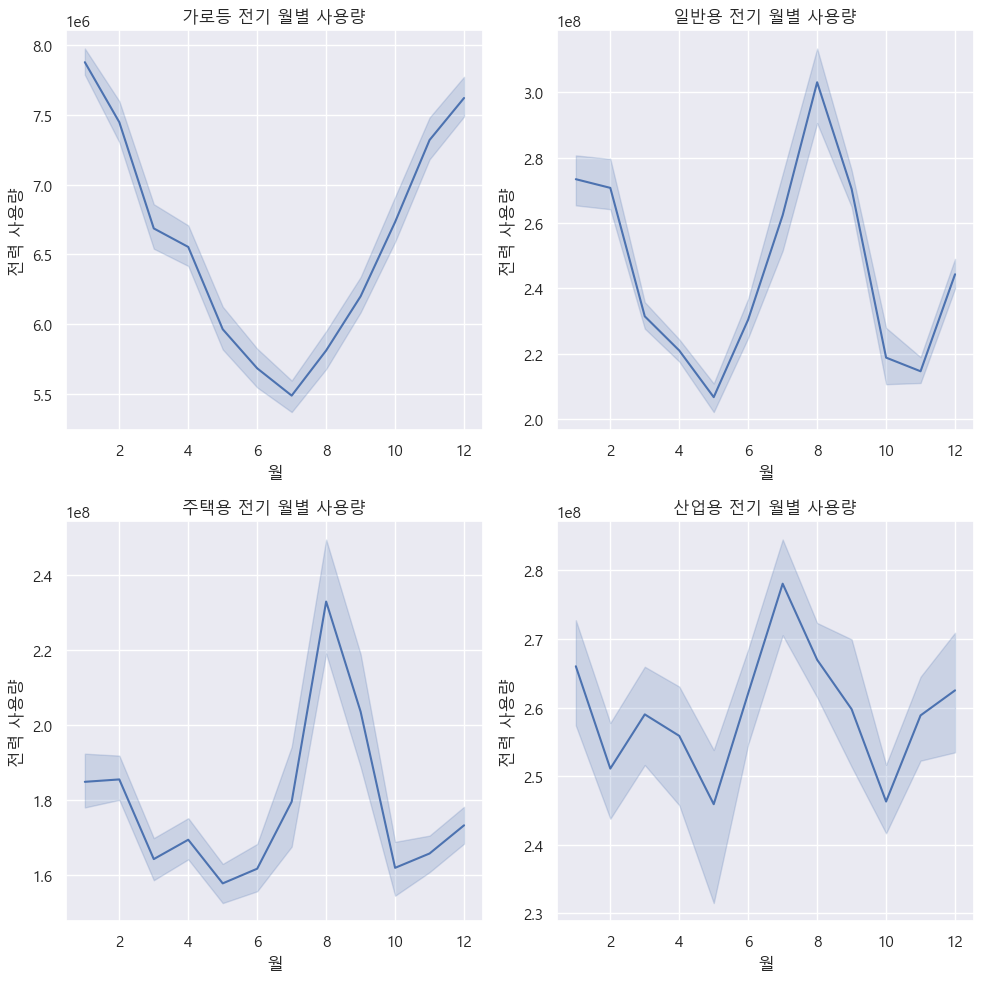

In [103]:
# typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}
#가로등 전기 월별 사용량 
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    
fig , ax  = plt.subplots(2,2) 
sns.set(rc={'figure.figsize':(10,10)})

sns.lineplot(data=type3_df, x = 'month', y='usage',ax=ax[0][0])
ax[0][0].set_xlabel('월')
ax[0][0].set_ylabel('전력 사용량')
ax[0][0].set_title('가로등 전기 월별 사용량')

#일반용 전기 월별 사용량 
sns.lineplot(data=type1_df, x = 'month', y='usage', ax=ax[0][1])
ax[0][1].set_xlabel('월')
ax[0][1].set_ylabel('전력 사용량')
ax[0][1].set_title('일반용 전기 월별 사용량')


#주택용 전기 월별 사용량
sns.lineplot(data=type2_df, x = 'month', y='usage', ax = ax[1][0])
ax[1][0].set_xlabel('월')
ax[1][0].set_ylabel('전력 사용량')
ax[1][0].set_title('주택용 전기 월별 사용량')


#산업용 전기 월별 사용량 
g = sns.lineplot(data=type6_df, x = 'month', y='usage',ax = ax[1][1])
ax[1][1].set_xlabel('월')
ax[1][1].set_ylabel('전력 사용량')
ax[1][1].set_title('산업용 전기 월별 사용량')
                                                               
plt.tight_layout()
plt.show()

In [104]:
df

year  month  type  temp  Humidity_mean  rainfall_total  cloud   solar  \
5    2016      1     1   0.9             69            49.7    6.0  244.83   
6    2016      1     2   0.9             69            49.7    6.0  244.83   
0    2016      1     3   0.9             69            49.7    6.0  244.83   
1    2016      1     4   0.9             69            49.7    6.0  244.83   
2    2016      1     5   0.9             69            49.7    6.0  244.83   
..    ...    ...   ...   ...            ...             ...    ...     ...   
581  2022     12     3   1.1             63            30.6    5.0  275.78   
582  2022     12     4   1.1             63            30.6    5.0  275.78   
583  2022     12     5   1.1             63            30.6    5.0  275.78   
584  2022     12     6   1.1             63            30.6    5.0  275.78   
585  2022     12     7   1.1             63            30.6    5.0  275.78   

     snow      usage  
5    13.5  255851378  
6    13.5  173309722  
0    13.5    7842078  
1    13.5   27092538  
2    13.5    9785066  
..    ...        ...  
581  32.9    7316937  
582  32.9   31159967  
583  32.9    8624110  
584  32.9  256259483  
585  32.9    8466299  

[588 rows x 10 columns]

In [105]:
df.columns

Index(['year', 'month', 'type', 'temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow', 'usage'],
      dtype='object')

In [106]:
day_df_corr = df.corr()
day_df_corr_sort = day_df_corr.sort_values('usage', ascending=False)
day_df_corr_sort.head(10)

year         month          type          temp  \
usage           1.544527e-02 -8.609918e-03 -3.548239e-01  5.038952e-03   
Humidity_mean  -5.976416e-04  3.562942e-01 -4.519488e-17  7.383405e-01   
cloud           4.198165e-02  5.237492e-02  3.178289e-17  5.427388e-01   
rainfall_total -4.081422e-02  1.257373e-01  1.505194e-17  6.107293e-01   
snow            8.476269e-02 -6.426208e-02  9.833063e-18 -5.215840e-01   
year            1.000000e+00  3.774111e-14  2.305034e-15  1.273597e-03   
temp            1.273597e-03  2.674031e-01 -3.129885e-17  1.000000e+00   
month           3.774111e-14  1.000000e+00  7.526169e-17  2.674031e-01   
solar           3.681638e-02 -2.196398e-01 -4.720550e-17  6.603860e-01   
type            2.305034e-15  7.526169e-17  1.000000e+00 -3.129885e-17   

                Humidity_mean  rainfall_total         cloud         solar  \
usage            2.646979e-02    1.804871e-02  2.564153e-02 -2.007282e-02   
Humidity_mean    1.000000e+00    6.850695e-01  7.599735e-01  8.197841e-02   
cloud            7.599735e-01    6.482212e-01  1.000000e+00  4.236026e-02   
rainfall_total   6.850695e-01    1.000000e+00  6.482212e-01  2.153267e-01   
snow            -2.283105e-01   -2.398070e-01 -1.387755e-01 -4.370830e-01   
year            -5.976416e-04   -4.081422e-02  4.198165e-02  3.681638e-02   
temp             7.383405e-01    6.107293e-01  5.427388e-01  6.603860e-01   
month            3.562942e-01    1.257373e-01  5.237492e-02 -2.196398e-01   
solar            8.197841e-02    2.153267e-01  4.236026e-02  1.000000e+00   
type            -4.519488e-17    1.505194e-17  3.178289e-17 -4.720550e-17   

                        snow     usage  
usage           1.631955e-02  1.000000  
Humidity_mean  -2.283105e-01  0.026470  
cloud          -1.387755e-01  0.025642  
rainfall_total -2.398070e-01  0.018049  
snow            1.000000e+00  0.016320  
year            8.476269e-02  0.015445  
temp           -5.215840e-01  0.005039  
month          -6.426208e-02 -0.008610  
solar          -4.370830e-01 -0.020073  
type            9.833063e-18 -0.354824

# 각 컬럼과의 상관 관계도

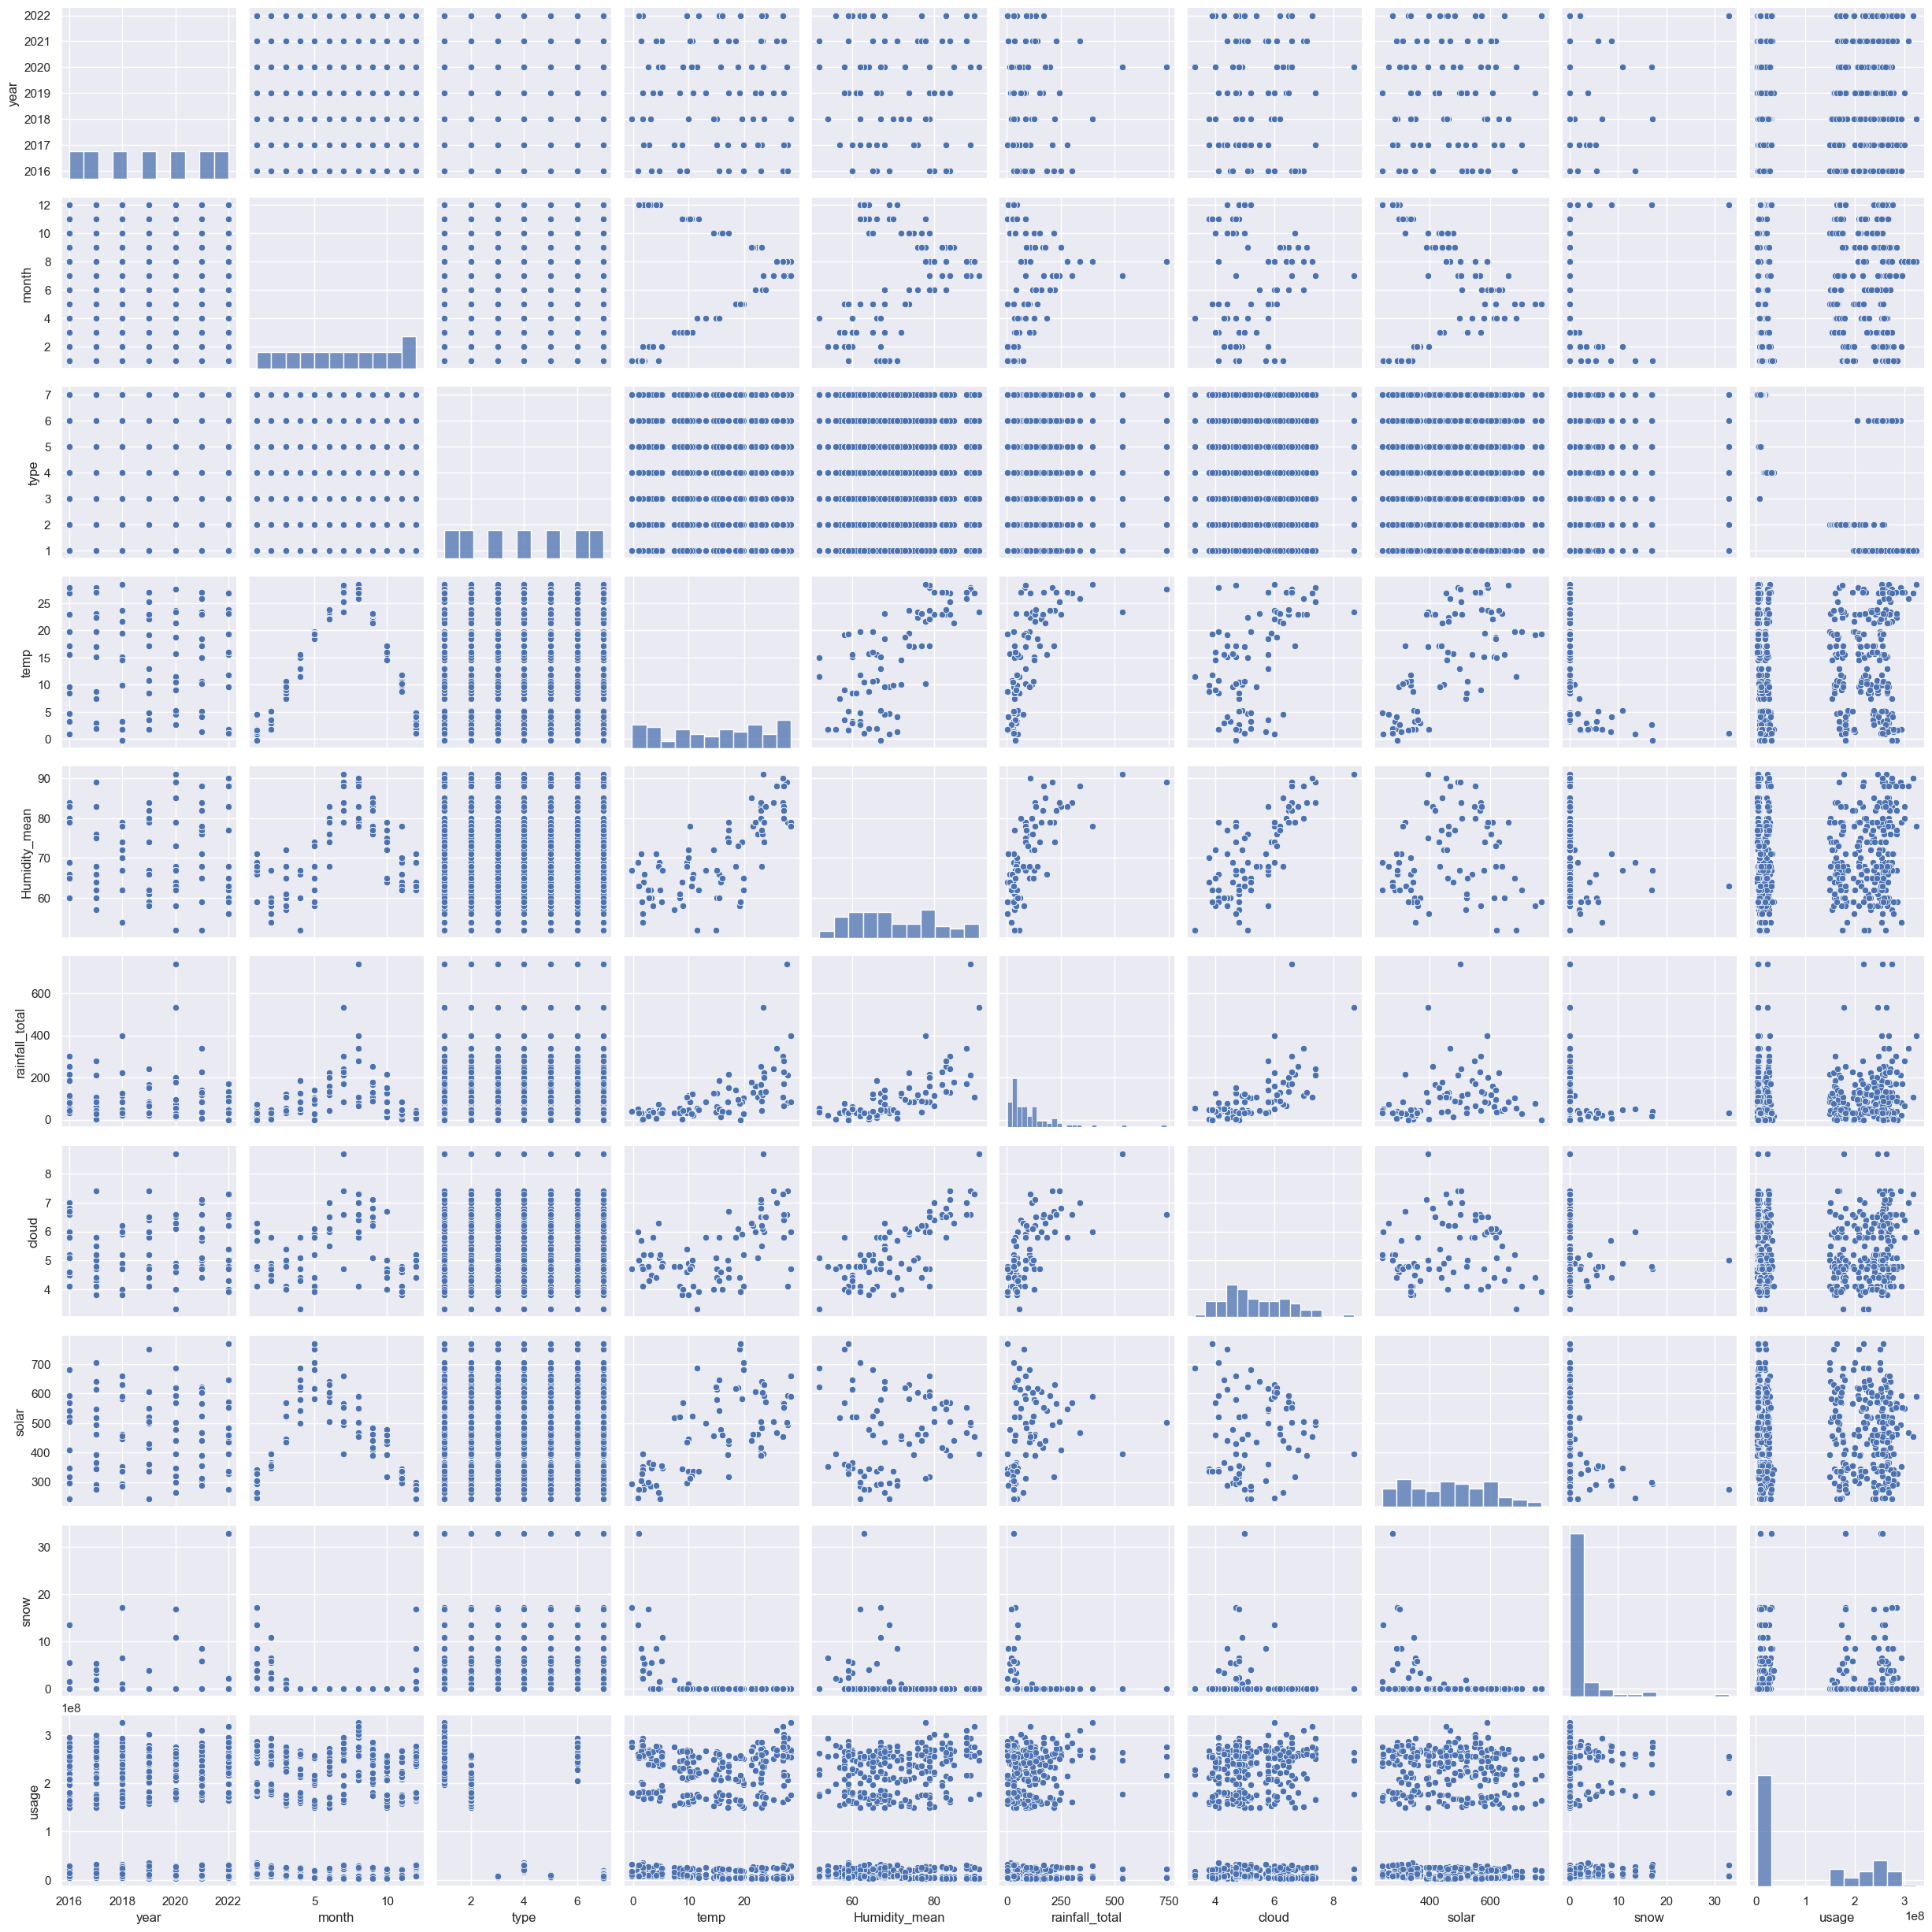

In [107]:
cols = ['year', 'month', 'type', 'temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow', 'usage']
sns.pairplot(df[cols])
plt.show()

# 전력 예측

필요라이브러리로드

In [108]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [109]:
df.head(2)

year  month  type  temp  Humidity_mean  rainfall_total  cloud   solar  \
5  2016      1     1   0.9             69            49.7    6.0  244.83   
6  2016      1     2   0.9             69            49.7    6.0  244.83   

   snow      usage  
5  13.5  255851378  
6  13.5  173309722

In [110]:
cols_train = ['year','month','type','temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow']
x_train_pre = df[cols_train]
y = df['usage'].values

# train, test 데이터 나눔 

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x_train_pre, y, test_size=0.2)

tensorflow Sequential모델 사용 

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [113]:
model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                100       
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 40)                1240      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [116]:
modelpath = 'vkwm1.hdf5'

In [117]:
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

In [118]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs = 4000, batch_size=32,
                    callbacks = [early_stopping_callback, checkpointer])

Epoch 1/4000
11/11 [==============================] - 1s 13ms/step - loss: 22955086221148160.0000 - val_loss: 22975678441848832.0000
Epoch 2/4000
11/11 [==============================] - 0s 5ms/step - loss: 22954978846965760.0000 - val_loss: 22975571067666432.0000
Epoch 3/4000
11/11 [==============================] - 0s 5ms/step - loss: 22954856440397824.0000 - val_loss: 22975433628712960.0000
Epoch 4/4000
11/11 [==============================] - 0s 5ms/step - loss: 22954701821575168.0000 - val_loss: 22975255387570176.0000
Epoch 5/4000
11/11 [==============================] - 0s 5ms/step - loss: 22954487073210368.0000 - val_loss: 22975012721917952.0000
Epoch 6/4000
11/11 [==============================] - 0s 5ms/step - loss: 22954210047819776.0000 - val_loss: 22974688451887104.0000
Epoch 7/4000
11/11 [==============================] - 0s 5ms/step - loss: 22953825648246784.0000 - val_loss: 22974267545092096.0000
Epoch 8/4000
11/11 [==============================] - 0s 5ms/step - loss: 2

In [119]:
real_kw = []
pred_kw = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw.append(real)
    pred_kw.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

4/4 [==============================] - 0s 1ms/step
실제kw: 248817607.00, 예상kw: 102350864.00
실제kw: 242265471.00, 예상kw: 98447320.00
실제kw: 7389522.00, 예상kw: 98386632.00
실제kw: 21737718.00, 예상kw: 105494584.00
실제kw: 254434089.00, 예상kw: 99180824.00
실제kw: 10632852.00, 예상kw: 100495520.00
실제kw: 11148705.00, 예상kw: 101433984.00
실제kw: 9634653.00, 예상kw: 101367904.00
실제kw: 254968942.00, 예상kw: 100665024.00
실제kw: 209947202.00, 예상kw: 103384448.00
실제kw: 17357640.00, 예상kw: 101803008.00
실제kw: 6682524.00, 예상kw: 102986888.00
실제kw: 256459950.00, 예상kw: 104648328.00
실제kw: 4511489.00, 예상kw: 102583040.00
실제kw: 6208722.00, 예상kw: 103420000.00
실제kw: 229101147.00, 예상kw: 107899880.00
실제kw: 257990750.00, 예상kw: 102749120.00
실제kw: 278238937.00, 예상kw: 99438920.00
실제kw: 267717054.00, 예상kw: 100939288.00
실제kw: 11023343.00, 예상kw: 101159712.00
실제kw: 7652187.00, 예상kw: 103243808.00
실제kw: 256314345.00, 예상kw: 103764456.00
실제kw: 185680622.00, 예상kw: 104073984.00
실제kw: 6617821.00, 예상kw: 105325296.00
실제kw: 171227429.00, 예상kw: 100682824.

tensorflow Sequential모델 실제와 예상 그래프

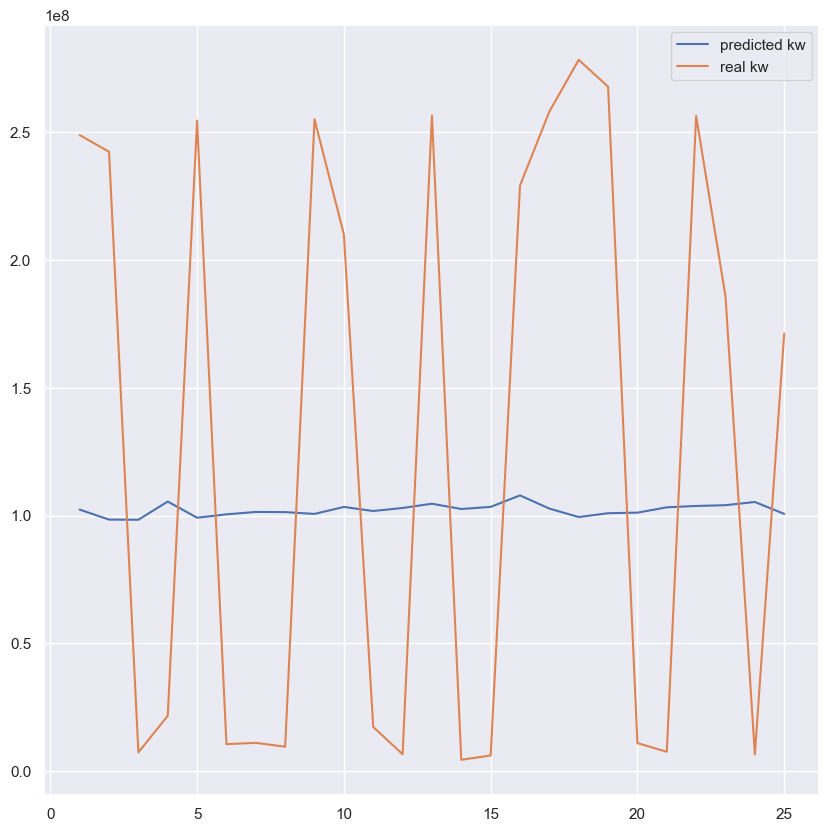

In [120]:
plt.plot(X_num, pred_kw, label='predicted kw')
plt.plot(X_num, real_kw, label='real kw')
plt.legend()
plt.show()

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
cols_train = ['year','month','type','temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow']
x_train_pre = df[cols_train]
y = df['usage'].values

In [123]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(x_train_pre, y, test_size=0.2, random_state=42)

# 다항회귀를 이용

In [167]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(470, 219)


# LinearRegression 모델 

In [168]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_poly, y_train)
print(linear.score(train_poly, y_train))
print(linear.score(test_poly, y_test))

0.5626394600672635
-0.0972306062002819


In [170]:
real_kw_linear = []
pred_kw_linear = []
X_num_linear = []

n_iter = 0
y_prd1 = linear.predict(test_poly).flatten()
for i in range(25):
    real = y_test[i]
    prediction = y_prd1[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw_linear.append(real)
    pred_kw_linear.append(prediction)
    n_iter += 1
    X_num_linear.append(n_iter)

실제kw: 6521294.00, 예상kw: 40581595.97
실제kw: 4442076.00, 예상kw: 133824546.84
실제kw: 197988897.00, 예상kw: 62713066.22
실제kw: 7958411.00, 예상kw: 58601464.16
실제kw: 265777737.00, 예상kw: 268133192.34
실제kw: 17150265.00, 예상kw: 123159674.53
실제kw: 271461864.00, 예상kw: 79120071.09
실제kw: 18364931.00, 예상kw: 153345495.69
실제kw: 263086823.00, 예상kw: 64685306.09
실제kw: 6066700.00, 예상kw: 123889550.72
실제kw: 3392893.00, 예상kw: -7866865.53
실제kw: 207452823.00, 예상kw: 274571809.41
실제kw: 6233652.00, 예상kw: 61327816.34
실제kw: 18965731.00, 예상kw: 65223224.47
실제kw: 7885102.00, 예상kw: 144911515.19
실제kw: 158237403.00, 예상kw: 63257267.34
실제kw: 4238926.00, 예상kw: 1545781.84
실제kw: 234770721.00, 예상kw: 294376001.22
실제kw: 277038051.00, 예상kw: 62693786.19
실제kw: 231561306.00, 예상kw: 263638072.19
실제kw: 208020235.00, 예상kw: 243319524.84
실제kw: 26992013.00, 예상kw: 82792462.97
실제kw: 7842078.00, 예상kw: 25072393.19
실제kw: 274886008.00, 예상kw: 55425949.84
실제kw: 19112020.00, 예상kw: 47629940.34


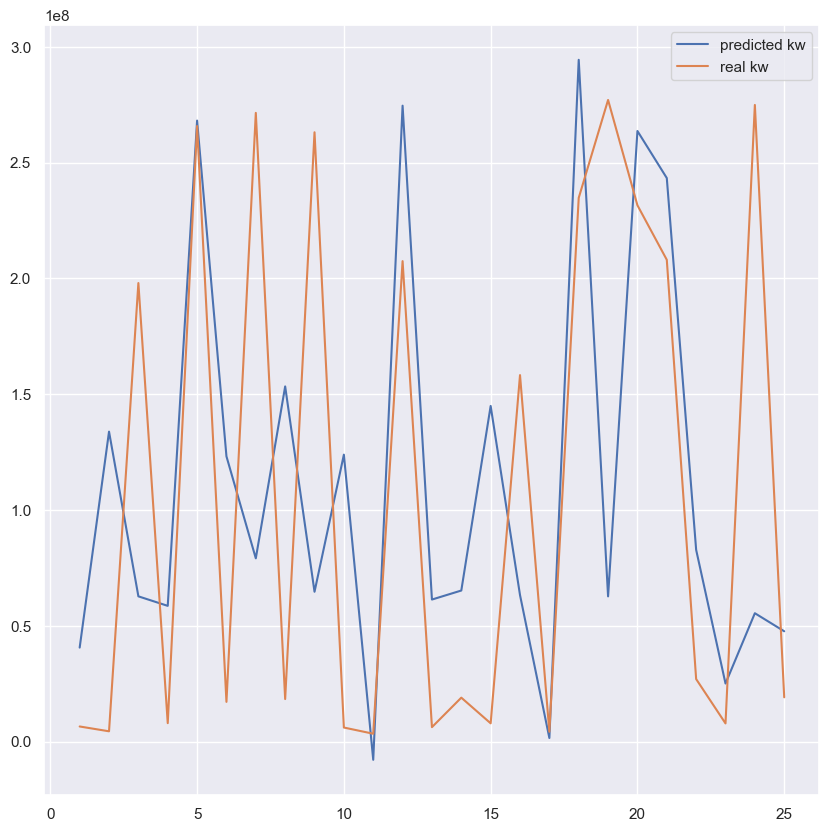

In [171]:
plt.plot(X_num_linear, pred_kw_linear, label='predicted kw')
plt.plot(X_num_linear, real_kw_linear, label='real kw')
plt.legend()
plt.show()

# Ridge 모델 

In [172]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_poly, y_train)
print(ridge.score(train_poly, y_train))
print(ridge.score(test_poly, y_test))

0.5601524866902483
-0.06155651130402795


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=9.8785e-22): result may not be accurate.



In [174]:
real_kw_ridge = []
pred_kw_ridge = []
X_num_ridge = []

n_iter = 0
y_prd2 = ridge.predict(test_poly).flatten()
for i in range(25):
    real = y_test[i]
    prediction = y_prd2[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw_ridge.append(real)
    pred_kw_ridge.append(prediction)
    n_iter += 1
    X_num_ridge.append(n_iter)

실제kw: 6521294.00, 예상kw: 45193731.79
실제kw: 4442076.00, 예상kw: 133344704.99
실제kw: 197988897.00, 예상kw: 76127160.46
실제kw: 7958411.00, 예상kw: 58897290.17
실제kw: 265777737.00, 예상kw: 294236647.38
실제kw: 17150265.00, 예상kw: 137008408.56
실제kw: 271461864.00, 예상kw: 79497210.12
실제kw: 18364931.00, 예상kw: 157785053.53
실제kw: 263086823.00, 예상kw: 72834985.15
실제kw: 6066700.00, 예상kw: 125945073.99
실제kw: 3392893.00, 예상kw: 3590119.47
실제kw: 207452823.00, 예상kw: 298789907.70
실제kw: 6233652.00, 예상kw: 63419107.59
실제kw: 18965731.00, 예상kw: 65222042.00
실제kw: 7885102.00, 예상kw: 138032719.20
실제kw: 158237403.00, 예상kw: 69664778.56
실제kw: 4238926.00, 예상kw: 9452701.78
실제kw: 234770721.00, 예상kw: 287255075.11
실제kw: 277038051.00, 예상kw: 64665087.11
실제kw: 231561306.00, 예상kw: 273310033.10
실제kw: 208020235.00, 예상kw: 244675046.04
실제kw: 26992013.00, 예상kw: 83009202.15
실제kw: 7842078.00, 예상kw: 26192886.86
실제kw: 274886008.00, 예상kw: 61112711.47
실제kw: 19112020.00, 예상kw: 48733422.00


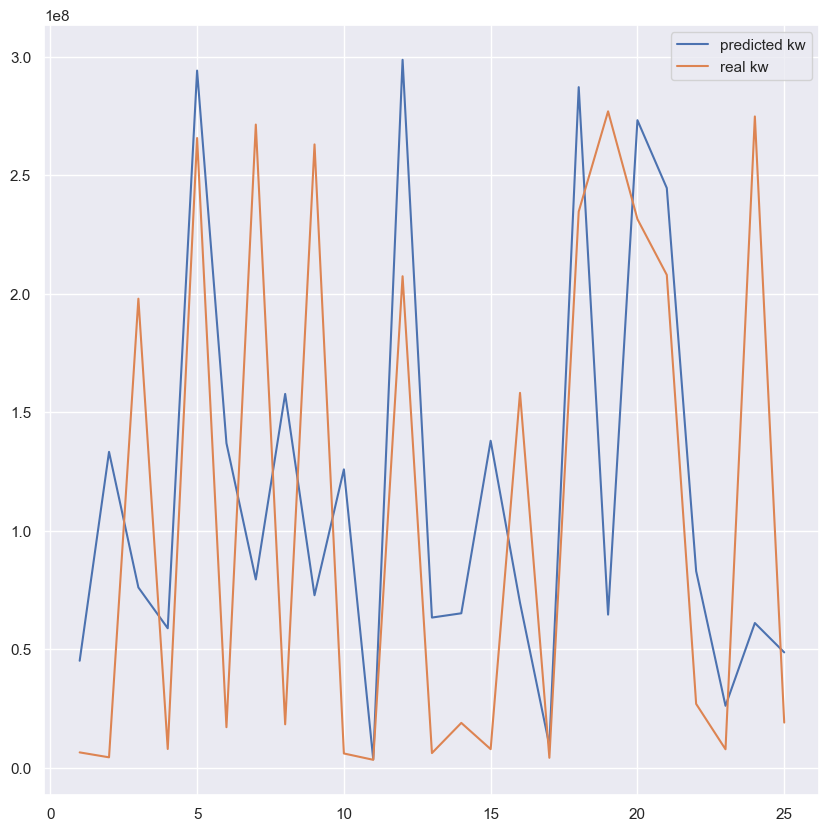

In [175]:
plt.plot(X_num_ridge, pred_kw_ridge, label='predicted kw')
plt.plot(X_num_ridge, real_kw_ridge, label='real kw')
plt.legend()
plt.show()

# Lasso 모델 

In [176]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_poly, y_train)
print(lasso.score(train_poly, y_train))
print(lasso.score(test_poly, y_test))

0.4998164245400235
0.11630726312684347


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+18, tolerance: 5.884e+14



In [177]:
real_kw_lasso = []
pred_kw_lasso = []
X_num_lasso = []

n_iter = 0
y_prd3 = lasso.predict(test_poly).flatten()
for i in range(25):
    real = y_test[i]
    prediction = y_prd3[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw_lasso.append(real)
    pred_kw_lasso.append(prediction)
    n_iter += 1
    X_num_lasso.append(n_iter)

실제kw: 6521294.00, 예상kw: 62006442.29
실제kw: 4442076.00, 예상kw: 104153718.93
실제kw: 197988897.00, 예상kw: 111757768.51
실제kw: 7958411.00, 예상kw: 103265458.86
실제kw: 265777737.00, 예상kw: 321417145.35
실제kw: 17150265.00, 예상kw: 122247568.11
실제kw: 271461864.00, 예상kw: 88489802.74
실제kw: 18364931.00, 예상kw: 96075357.74
실제kw: 263086823.00, 예상kw: 89366967.39
실제kw: 6066700.00, 예상kw: 102129389.48
실제kw: 3392893.00, 예상kw: 102874939.96
실제kw: 207452823.00, 예상kw: 243395784.31
실제kw: 6233652.00, 예상kw: 40288576.06
실제kw: 18965731.00, 예상kw: 37094987.32
실제kw: 7885102.00, 예상kw: 136388833.22
실제kw: 158237403.00, 예상kw: 92360214.32
실제kw: 4238926.00, 예상kw: 64756582.68
실제kw: 234770721.00, 예상kw: 274730331.52
실제kw: 277038051.00, 예상kw: 80651705.93
실제kw: 231561306.00, 예상kw: 266425815.48
실제kw: 208020235.00, 예상kw: 211576850.44
실제kw: 26992013.00, 예상kw: 35402117.73
실제kw: 7842078.00, 예상kw: 36868131.83
실제kw: 274886008.00, 예상kw: 72884947.71
실제kw: 19112020.00, 예상kw: 20913332.07


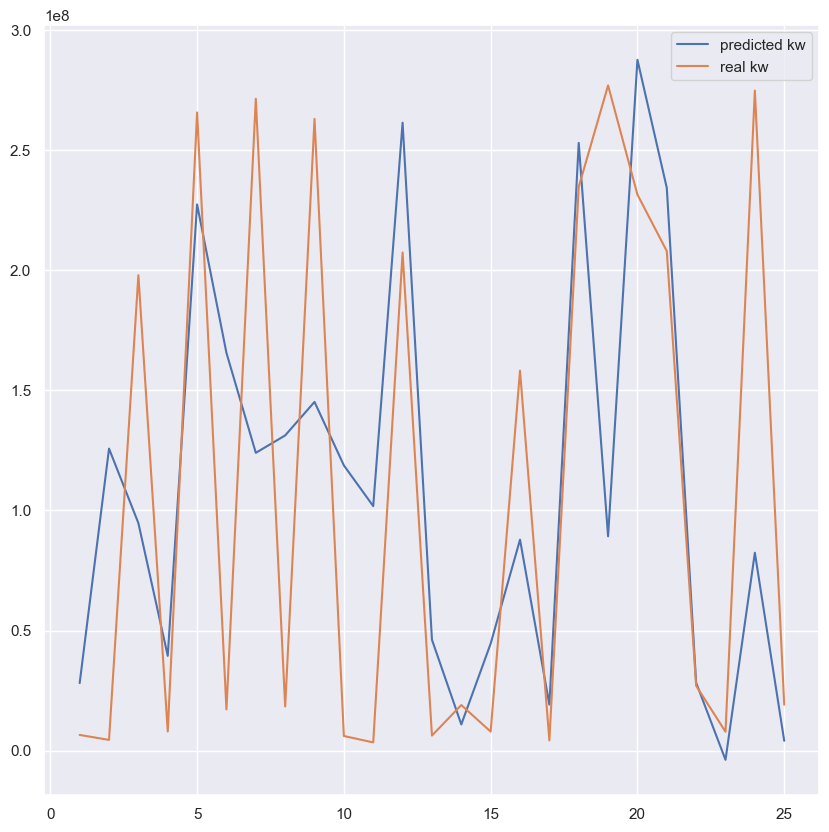

In [152]:
plt.plot(X_num_lasso, pred_kw_lasso, label='predicted kw')
plt.plot(X_num_lasso, real_kw_lasso, label='real kw')
plt.legend()
plt.show()

In [178]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(470, 2001)


# python sklearn 데이터 전처리 단계에 사용하는 표준화 StandardScaler

In [179]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

linear 모델

In [180]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(train_scaled, y_train)
print(linear.score(train_scaled, y_train))
print(linear.score(test_scaled, y_test))

0.922459306064051
-1.0351908143891072e+17


In [181]:
real_kw_linear2 = []
pred_kw_linear2 = []
X_num_linear2 = []

n_iter = 0
y_prd1 = linear.predict(test_scaled).flatten()
for i in range(25):
    real = y_test[i]
    prediction = y_prd1[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw_linear2.append(real)
    pred_kw_linear2.append(prediction)
    n_iter += 1
    X_num_linear2.append(n_iter)

실제kw: 6521294.00, 예상kw: 77713275.89
실제kw: 4442076.00, 예상kw: 117608315.89
실제kw: 197988897.00, 예상kw: 165857522.22
실제kw: 7958411.00, 예상kw: 130207611.89
실제kw: 265777737.00, 예상kw: -74035332.11
실제kw: 17150265.00, 예상kw: 258605498.97
실제kw: 271461864.00, 예상kw: 237047675.89
실제kw: 18364931.00, 예상kw: 74850132.79
실제kw: 263086823.00, 예상kw: 159993723.89
실제kw: 6066700.00, 예상kw: 80023419.89
실제kw: 3392893.00, 예상kw: -201764996.11
실제kw: 207452823.00, 예상kw: 404377467.89
실제kw: 6233652.00, 예상kw: 113102715.89
실제kw: 18965731.00, 예상kw: -70004868.11
실제kw: 7885102.00, 예상kw: 41575199514987752.00
실제kw: 158237403.00, 예상kw: 117034875.89
실제kw: 4238926.00, 예상kw: -29560964.11
실제kw: 234770721.00, 예상kw: 234524539.89
실제kw: 277038051.00, 예상kw: 216237822.05
실제kw: 231561306.00, 예상kw: 346733507.67
실제kw: 208020235.00, 예상kw: -396124292.11
실제kw: 26992013.00, 예상kw: -45740164.11
실제kw: 7842078.00, 예상kw: 81167305.18
실제kw: 274886008.00, 예상kw: 260269947.89
실제kw: 19112020.00, 예상kw: -63205508.11


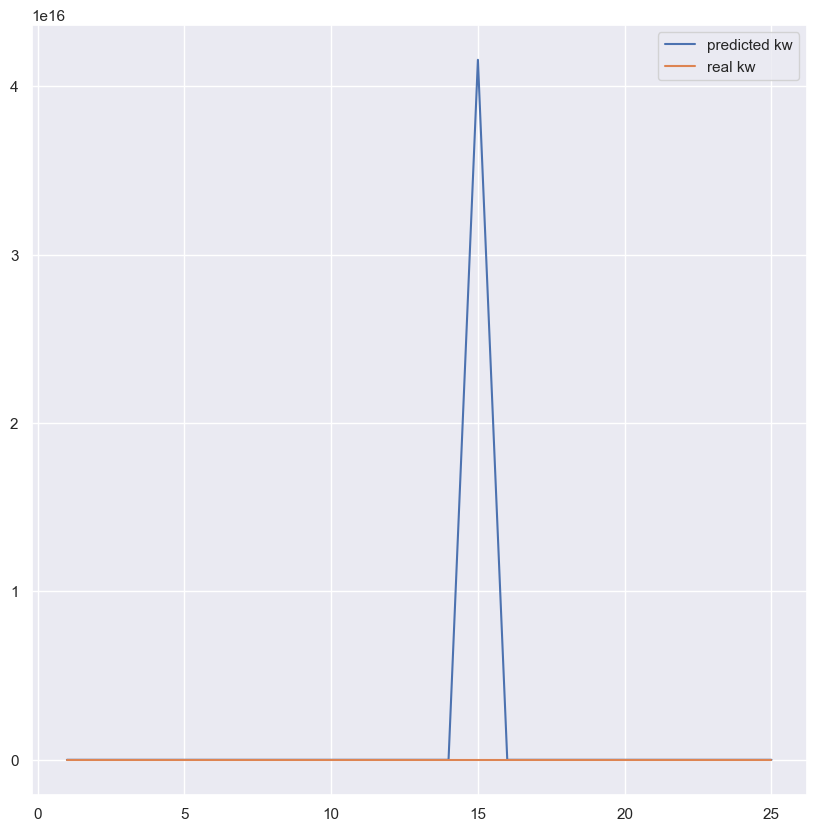

In [166]:
plt.plot(X_num_linear2, pred_kw_linear2, label='predicted kw')
plt.plot(X_num_linear2, real_kw_linear2, label='real kw')
plt.legend()
plt.show()

ridge 모델 

In [182]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.6902470014493902
0.16741988428811105


In [183]:
real_kw_ridge2 = []
pred_kw_ridge2 = []
X_num_ridge2 = []

n_iter = 0
y_prd1 = ridge.predict(test_scaled).flatten()
for i in range(25):
    real = y_test[i]
    prediction = y_prd1[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw_ridge2.append(real)
    pred_kw_ridge2.append(prediction)
    n_iter += 1
    X_num_ridge2.append(n_iter)

실제kw: 6521294.00, 예상kw: 48791902.65
실제kw: 4442076.00, 예상kw: 111098106.34
실제kw: 197988897.00, 예상kw: 109007722.71
실제kw: 7958411.00, 예상kw: 58920325.37
실제kw: 265777737.00, 예상kw: 298051066.85
실제kw: 17150265.00, 예상kw: 142031551.32
실제kw: 271461864.00, 예상kw: 135533014.96
실제kw: 18364931.00, 예상kw: 167444066.02
실제kw: 263086823.00, 예상kw: 138009065.22
실제kw: 6066700.00, 예상kw: 135076013.82
실제kw: 3392893.00, 예상kw: 50511530.43
실제kw: 207452823.00, 예상kw: 250995965.36
실제kw: 6233652.00, 예상kw: 48672831.11
실제kw: 18965731.00, 예상kw: 14793620.31
실제kw: 7885102.00, 예상kw: 90224616.12
실제kw: 158237403.00, 예상kw: 93157893.20
실제kw: 4238926.00, 예상kw: 19684713.28
실제kw: 234770721.00, 예상kw: 259400292.39
실제kw: 277038051.00, 예상kw: 76534812.58
실제kw: 231561306.00, 예상kw: 274611269.47
실제kw: 208020235.00, 예상kw: 239379564.47
실제kw: 26992013.00, 예상kw: 36125924.11
실제kw: 7842078.00, 예상kw: 24009400.12
실제kw: 274886008.00, 예상kw: 112425666.31
실제kw: 19112020.00, 예상kw: 20063595.56


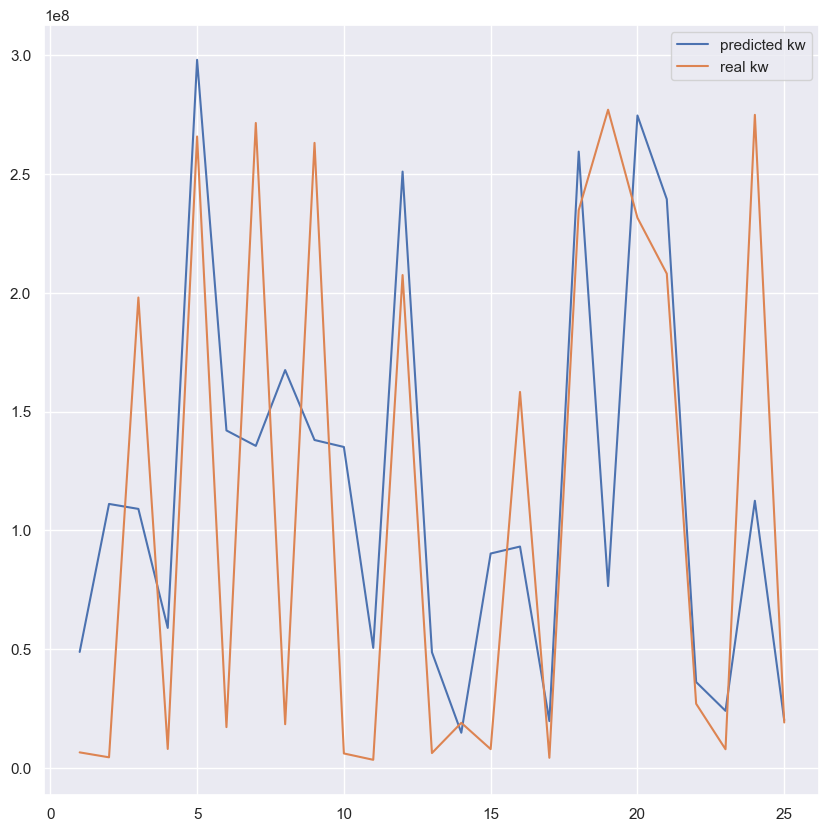

In [162]:
plt.plot(X_num_ridge2, pred_kw_ridge2, label='predicted kw')
plt.plot(X_num_ridge2, real_kw_ridge2, label='real kw')
plt.legend()
plt.show()

lasso 모델 

In [184]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.7228915268780619
0.1311756094859412


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.153e+17, tolerance: 5.884e+14



In [185]:
real_kw_lasso2 = []
pred_kw_lasso2 = []
X_num_lasso2 = []

n_iter = 0
y_prd1 = lasso.predict(test_scaled).flatten()
for i in range(25):
    real = y_test[i]
    prediction = y_prd1[i]
    print("실제kw: {:.2f}, 예상kw: {:.2f}".format(real, prediction))
    real_kw_lasso2.append(real)
    pred_kw_lasso2.append(prediction)
    n_iter += 1
    X_num_lasso2.append(n_iter)

실제kw: 6521294.00, 예상kw: 28100858.01
실제kw: 4442076.00, 예상kw: 125758610.36
실제kw: 197988897.00, 예상kw: 94731475.81
실제kw: 7958411.00, 예상kw: 39470207.02
실제kw: 265777737.00, 예상kw: 227473466.94
실제kw: 17150265.00, 예상kw: 165615398.25
실제kw: 271461864.00, 예상kw: 124008884.88
실제kw: 18364931.00, 예상kw: 131255767.36
실제kw: 263086823.00, 예상kw: 145218082.13
실제kw: 6066700.00, 예상kw: 118770330.23
실제kw: 3392893.00, 예상kw: 101815986.51
실제kw: 207452823.00, 예상kw: 261518470.36
실제kw: 6233652.00, 예상kw: 46163899.39
실제kw: 18965731.00, 예상kw: 10888299.98
실제kw: 7885102.00, 예상kw: 44553102.83
실제kw: 158237403.00, 예상kw: 87854003.09
실제kw: 4238926.00, 예상kw: 19155958.43
실제kw: 234770721.00, 예상kw: 253091939.86
실제kw: 277038051.00, 예상kw: 89229365.15
실제kw: 231561306.00, 예상kw: 287704136.19
실제kw: 208020235.00, 예상kw: 234359329.39
실제kw: 26992013.00, 예상kw: 28250526.02
실제kw: 7842078.00, 예상kw: -3845692.32
실제kw: 274886008.00, 예상kw: 82387624.88
실제kw: 19112020.00, 예상kw: 4076944.10


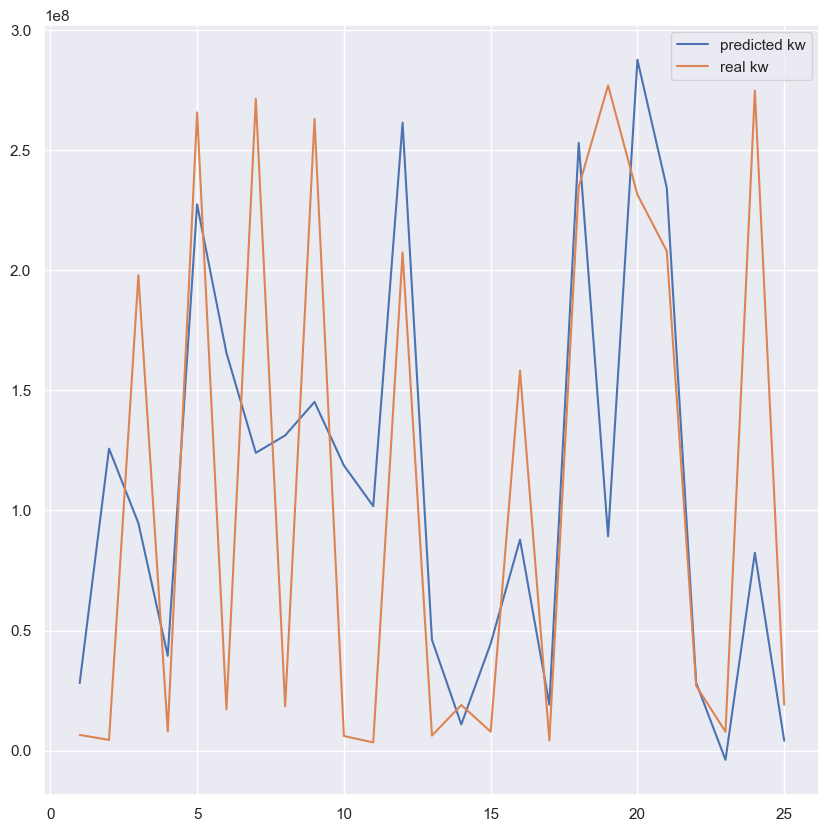

In [186]:
plt.plot(X_num_lasso2, pred_kw_lasso2, label='predicted kw')
plt.plot(X_num_lasso2, real_kw_lasso2, label='real kw')
plt.legend()
plt.show()

수렴 경고: 목표가 수렴되지 않았습니다. 반복 횟수를 늘리고 피쳐의 크기를 확인하거나 정규화를 늘리는 것을 고려할 수 있습니다.

데이터량을 늘리기 위해 일별 데이터로 시작하였습니다.